In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from pyrsimg import readTiff, imgShow


In [2]:
path_atl03 = 'data/isat2/processed_ATL03_20190909174803_11250402_006_02.h5'
path_atl13 = 'data/isat2/processed_ATL13_20190909174101_11250401_006_01.h5'
path_rsimg = 'data/rsimg/region_l8_20190909_wgs84.tif'


In [ ]:
beams = ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']
step = 10


In [3]:
# !gdalwarp -overwrite -s_srs EPSG:32645 -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES data/rsimg/region_l8_20190504.tif data/rsimg/region_l8_20190504_wgs84.tif


In [11]:
!h5ls $path_atl13/gt1r


anom_ssegs               Group
atl13refid               Dataset {313/Inf}
bottom_lat               Dataset {313/Inf}
bottom_lon               Dataset {313/Inf}
cloud_flag_asr_atl09     Dataset {313/Inf}
cloud_flag_atm_atl09     Dataset {313/Inf}
cycle_number             Dataset {313/Inf}
delta_time               Dataset {313/Inf}
err_ht_water_surf        Dataset {313/Inf}
err_slope_trk            Dataset {313/Inf}
ht_ortho                 Dataset {313/Inf}
ht_water_surf            Dataset {313/Inf}
ice_flag                 Dataset {313/Inf}
inland_water_body_id     Dataset {313/Inf}
inland_water_body_region Dataset {313/Inf}
inland_water_body_size   Dataset {313/Inf}
inland_water_body_source Dataset {313/Inf}
inland_water_body_type   Dataset {313/Inf}
layer_flag_atl09         Dataset {313/Inf}
met_ts_atl09             Dataset {313/Inf}
met_wind10_atl09         Dataset {313/Inf}
met_wind10_atl13         Dataset {313/Inf}
qf_bckgrd                Dataset {313/Inf}
qf_bias_em             

In [5]:
!h5ls $path_atl03/gt1r/heights
# !h5ls $path_atl06/orbit_info


delta_time               Dataset {264073/Inf}
dist_ph_across           Dataset {264073/Inf}
dist_ph_along            Dataset {264073/Inf}
h_ph                     Dataset {264073/Inf}
lat_ph                   Dataset {264073/Inf}
lon_ph                   Dataset {264073/Inf}
pce_mframe_cnt           Dataset {264073/Inf}
ph_id_channel            Dataset {264073/Inf}
ph_id_count              Dataset {264073/Inf}
ph_id_pulse              Dataset {264073/Inf}
quality_ph               Dataset {264073/Inf}
signal_conf_ph           Dataset {264073/Inf, 5/Inf}
weight_ph                Dataset {264073/Inf}


In [ ]:
atl03_ph = {}
atl13_ph = {}
with h5py.File(path_atl03,'r') as setp_atl03:
    for beam in beams:
        atl03_ph[beam+'_lon'] = setp_atl03[beam+'/heights/lon_ph'][:]
        atl03_ph[beam+'_lat'] = setp_atl03[beam+'/heights/lat_ph'][:]
        atl03_ph[beam+'_h'] = setp_atl03[beam+'/heights/h_ph'][:]

with h5py.File(path_atl13,'r') as setp_atl13:
    for beam in beams:
        atl13_ph[beam+'_lon'] = setp_atl13[beam+'/segment_lon'][:]
        atl13_ph[beam+'_lat'] = setp_atl13[beam+'/segment_lat'][:]
        atl13_ph[beam+'_h'] = setp_atl13[beam+'/ht_water_surf'][:]

## 2. remote sensing image
rsimg = readTiff(path_rsimg)


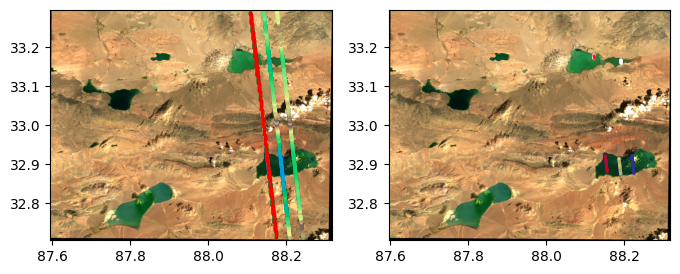

In [28]:
fig = plt.figure(figsize=(8,4))
ax_1 = plt.subplot(1,2,1)
imgShow(img = rsimg.array, clip_percent=2, ax=ax_1, extent=rsimg.geoextent)

for beam in beams:
  plt.scatter(atl03_ph[beam+'_lon'][::step], atl03_ph[beam+'_lat'][::step], s=2, \
                                  c=atl03_ph[beam+'_h'][::step], alpha=0.1, cmap='terrain')
plt.scatter(atl03_ph['gt1l_lon'][::step], atl03_ph['gt1l_lat'][::step], s=2, c='red', alpha=0.1)

ax_2 = plt.subplot(1,2,2)
imgShow(img = rsimg.array, clip_percent=2, ax=ax_2, extent=rsimg.geoextent)
for beam in beams:
  plt.scatter(atl13_ph[beam+'_lon'], atl13_ph[beam+'_lat'], s=2, c=atl13_ph[beam+'_h'], alpha=0.1, cmap='terrain')
plt.scatter(atl13_ph['gt1l_lon'], atl13_ph['gt1l_lat'], s=2, c='red', alpha=0.1)



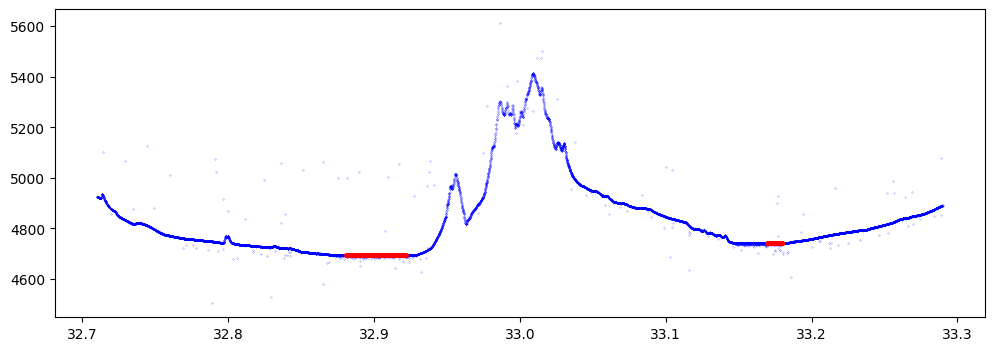

In [24]:
fig = plt.figure(figsize=(12,4))
plt.plot(atl03_ph['gt1l_lat'][::5], atl03_ph['gt1l_h'][::5],  'b.',  markersize=0.3)
plt.plot(atl13_ph['gt1l_lat'], atl13_ph['gt1l_h'], 'r.',  markersize=5)


### Sub-region

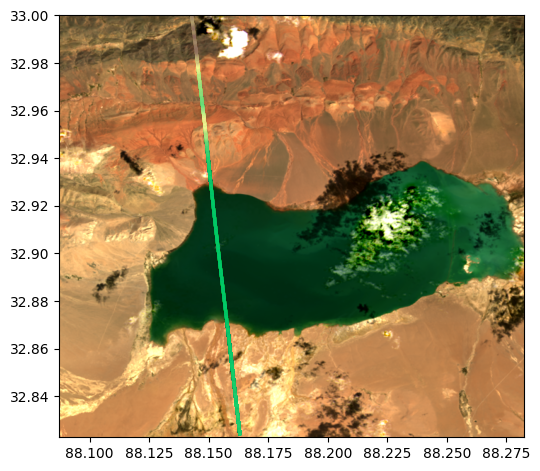

In [29]:
ids_atl03 = np.where((atl03_ph['gt1r_lon']>88.10) & (atl03_ph['gt1r_lon'] < 88.275) & \
                     (atl03_ph['gt1r_lat']>32.824) &  (atl03_ph['gt1r_lat'] < 33))[0]
fig, ax = plt.subplots(figsize=(6, 6))
imgShow(img = rsimg.array, clip_percent=2, ax=ax, extent=rsimg.geoextent, focus_per=[0.5, 0.8, 0.68, 0.95])
plt.scatter(atl03_ph['gt1r_lon'][ids_atl03], atl03_ph['gt1r_lat'][ids_atl03], s=2, c=atl03_ph['gt1r_h'][ids_atl03], alpha=0.1, cmap='terrain')



([<matplotlib.axis.YTick at 0x7fa232302050>,
 [Text(0, 4688, '4688'),
  Text(0, 4692, '4692'),
  Text(0, 4696, '4696'),
  Text(0, 4700, '4700')])

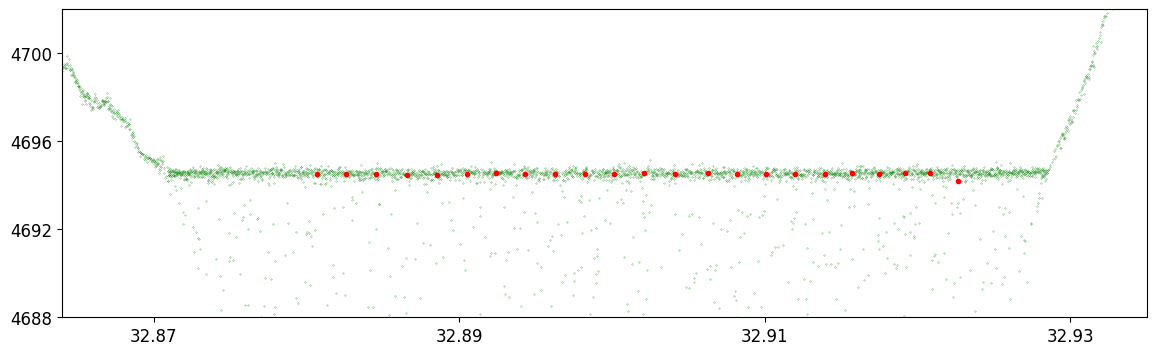

In [33]:
fig = plt.figure(figsize=(14,4))
plt.plot(atl03_ph['gt1r_lat'][::step], atl03_ph['gt1r_h'][::step],  'g.',  markersize=0.4)
plt.plot(atl13_ph['gt1r_lat'][::step], atl13_ph['gt1r_h'][::step], 'r.')
plt.ylim(4688, 4702)
plt.xlim(32.864, 32.935)
plt.xticks([32.87, 32.89, 32.91, 32.93], fontsize=12)
plt.yticks([4688, 4692, 4696, 4700], fontsize=12)

